# A/B Hyphotesis Testing

# Section 1. Analysis of the data

In [ ]:
#importing The Required Libraries
from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans


import chart_studio.plotly as py
import plotly.offline as pyoff

import plotly.graph_objs as go

import plotly.figure_factory as ff

import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

#initiate plotly
pyoff.init_notebook_mode()

1. Perform data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data. For each of the plots you produce, write a description of what the plot shows in markdown cells.

In [ ]:
data = pd.read_csv('../data/AdSmartABdata.csv')

In [ ]:
data.head()

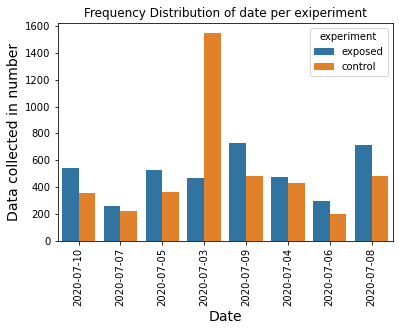

In [10]:
sns.countplot(x="date", hue="experiment", data=data)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of date per exiperiment')
plt.ylabel('Data collected in number', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()

as shown on the graph the data gathered was maximum on the first day

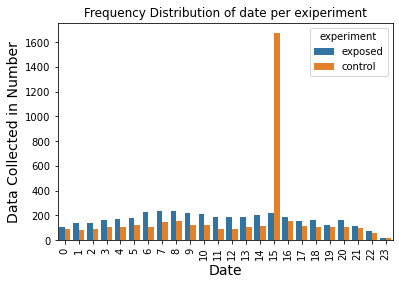

In [24]:
sns.countplot(x="hour", hue="experiment", data=data)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of date per exiperiment')
plt.ylabel('Data Collected in Number', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()

as shown on the graph the data gathered was maximum on the thee 15th hour

# Let's see our Data distribution without the data from hour = 15

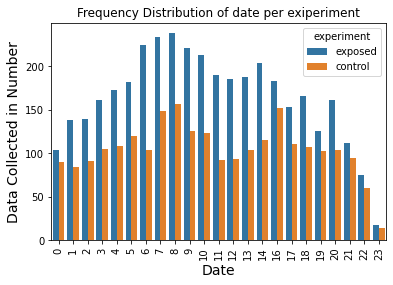

In [5]:
hour_data = data[data['hour']!=15]
sns.countplot(x="hour", hue="experiment", data=hour_data)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of date per exiperiment')
plt.ylabel('Data Collected in Number', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()

as shown on the graph the data gathered was uniform throught out the day

# Now lets see our distrubution on the success metrics of our data sets

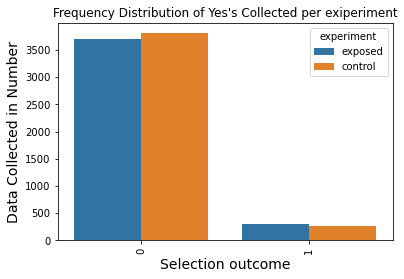

In [13]:
sns.countplot(x="yes", hue="experiment", data=data)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Yes\'s Collected per exiperiment')
plt.ylabel('Data Collected in Number', fontsize=14)
plt.xlabel('Selection outcome', fontsize=14)
plt.show()

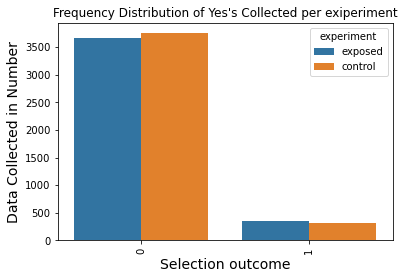

In [14]:
sns.countplot(x="no", hue="experiment", data=data)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Yes\'s Collected per exiperiment')
plt.ylabel('Data Collected in Number', fontsize=14)
plt.xlabel('Selection outcome', fontsize=14)
plt.show()

# Let's Polish the data and get insight of those who have responded to the questionnarie

In [15]:
data_polished = data[(data['yes'] != 0) | data['no'] != 0]
data_polished

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


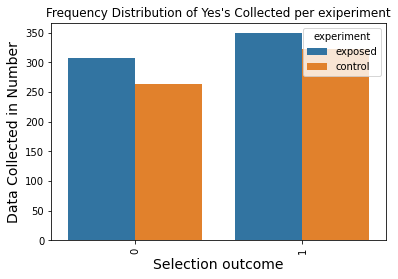

In [16]:
sns.countplot(x="no", hue="experiment", data=data_polished)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Yes\'s Collected per exiperiment')
plt.ylabel('Data Collected in Number', fontsize=14)
plt.xlabel('Selection outcome', fontsize=14)
plt.show()

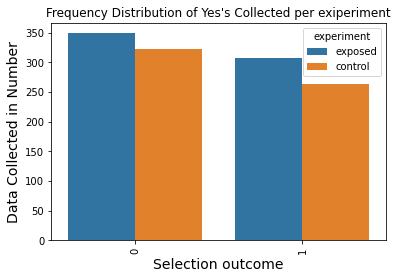

In [17]:
sns.countplot(x="yes", hue="experiment", data=data_polished)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Yes\'s Collected per exiperiment')
plt.ylabel('Data Collected in Number', fontsize=14)
plt.xlabel('Selection outcome', fontsize=14)
plt.show()

 as shown on the graph the data gathered from the user is faily distrubuted

In [18]:
print("Exposed Group percentage: " + "{:.2f}"
      .format(data[data['experiment'] == 'exposed']
      .experiment.count()/data.experiment.count() * 100) + "%")

Exposed Group percentage: 49.60%


In [19]:
print("Control Group percentage: " + "{:.2f}"
      .format(data[data['experiment'] == 'control']
      .experiment.count()/data.experiment.count() * 100) + "%")

Control Group percentage: 50.40%


In [20]:
print("Exposed Group percentage: " + "{:.2f}"
      .format(data_polished[data_polished['experiment'] == 'exposed']
      .experiment.count()/data_polished.experiment.count() * 100) + "%")

Exposed Group percentage: 52.86%


In [21]:
print("Control Group percentage: " + "{:.2f}"
      .format(data_polished[data_polished['experiment'] == 'control']
      .experiment.count()/data_polished.experiment.count() * 100) + "%")

Control Group percentage: 47.14%


As we can see on the above count we have approximately took 50% samples from both exposed and control group

# Perform hypothesis testing: apply the classical p-value based algorithm and the sequential A/B testing algorithm for which a starter code is provided..

In [6]:
exposed_results = data[data.experiment == 'exposed'].yes
control_results = data[data.experiment == 'control'].yes

hist_data = [exposed_results, control_results]

group_labels = ['exposed', 'control']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,
                         curve_type='normal',show_rug=False)

fig.layout = go.Layout(
        title='No of Yes of Exposed vs Control users',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )


# Plot!
pyoff.iplot(fig)

The results are looking really good. The density of the Exposed Users is better starting from 0.2. But how we can certainly say this experiment is successful and the difference didn’t happen due to other factors?

To answer this question, we need to check if the uptick in the test group is statistically significant. scipy library allows us to programmatically check this:

In [24]:
from scipy import stats 
exposed_result = stats.ttest_ind(exposed_results, control_results)
print(exposed_result)

Ttest_indResult(statistic=2.108610239127817, pvalue=0.035008955674483075)


ttest_ind() method returns two output:

t-statistic: represents the difference between averages of exposed and control experiment group in units of standard error. Higher t-statistic value means bigger difference and supports our hypothesis.
p-value: measures the probability of the null hypothesis to be true.
To Explain null hypothesis:

If null hypothesis is true, it means there is no significant difference between your test and control group. So the lower p-value means the better. As the industry standard, we accept that p-value<5% makes the result statistically significant (but it depends on your business logic, there are cases that people use 10% or even 1%).

# To understand if our test is statistically significant or not, let’s build a function and apply to our dataset:

In [25]:
def eval_test(exposed_results,control_results):
    exposed_result = stats.ttest_ind(exposed_results, control_results)
    if exposed_result[1] < 0.05: #checking if p value is less than 
        print('result is significant')
    else:
        print('result is not significant')

In [26]:
#lets test our data now
eval_test(exposed_results,control_results)

result is significant


Looks great but unfortunately, it is not that simple. If you select a biased test group, your results will be statistically significant by default. As an example, if we allocate more high-value customer to test group and more low-value customers to control group, then our experiment becomes a failure from the beginning. That’s why selecting the group is the key to a healthy A/B test.

In [27]:

class stat:
    
    def __init__(self):
        pass
    
    def pooled_prob(self, num_a, num_b, rate_a, rate_b):
        """Returns pooled probability for two samples"""
        return (rate_a + rate_a) / (num_a + num_a)


    def pooled_SE(self, num_a, num_b, rate_a, rate_b):
        """Returns the pooled standard error for two samples"""
        p_hat = self.pooled_prob(num_a, num_b, rate_a, rate_b)
        SE = np.sqrt(p_hat * (1 - p_hat) * (1 / num_a + 1 / num_b))
        return SE

    def confidence_interval(self, sample_mean=0, sample_std=1, sample_size=1,
                            sig_level=0.05):
        """Returns the confidence interval as a tuple"""
        z = self.z_val(sig_level)

        left = sample_mean - z * sample_std / np.sqrt(sample_size)
        right = sample_mean + z * sample_std / np.sqrt(sample_size)

        return (left, right)

    def ab_dist(self, stderr, d_hat=0, group_type='control'):
        """Returns a distribution object depending on group type
        Examples:
        Parameters:
            stderr (float): pooled standard error of two independent samples
            d_hat (float): the mean difference between two independent samples
            group_type (string): 'control' and 'test' are supported
        Returns:
            dist (scipy.stats distribution object)
        """
        if group_type == 'control':
            sample_mean = 0

        elif group_type == 'test':
            sample_mean = d_hat

        # create a normal distribution which is dependent on mean and std dev
        dist = scs.norm(sample_mean, stderr)
        return dist

    def p_val(self, c_total, e_total, bcr, d_hat) :
        """Returns the p-value for an A/B test"""
        std_a = np.sqrt(bcr * (1 - bcr) / c_total)
        std_b = np.sqrt((bcr+d_hat) * (1 - (bcr+d_hat)) / e_total)
        z_score = (d_hat) / np.sqrt(std_a**2 + std_b**2)
        return  scs.norm().sf(z_score)
    
    def z_val(self, sig_level=0.05, two_tailed=True):
        """Returns the z value for a given significance level"""
        z_dist = scs.norm()
        if two_tailed:
            sig_level = sig_level/2
            area = 1 - sig_level
        else:
            area = 1 - sig_level

        z = z_dist.ppf(area)

        return z
    
    def min_sample_size(self, bcr, mde, power=0.8, sig_level=0.05):
        """Returns the minimum sample size to set up a split test
        Arguments:
            bcr (float): probability of success for control, sometimes
            referred to as baseline conversion rate
            mde (float): minimum change in measurement between control
            group and test group if alternative hypothesis is true, sometimes
            referred to as minimum detectable effect
            power (float): probability of rejecting the null hypothesis when the
            null hypothesis is false, typically 0.8
            sig_level (float): significance level often denoted as alpha,
            typically 0.05
        Returns:
            min_N: minimum sample size (float)
        References:
            Stanford lecture on sample sizes
            http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
        """
        # standard normal distribution to determine z-values
        standard_norm = scs.norm(0, 1)

        # find Z_beta from desired power
        Z_beta = standard_norm.ppf(power)

        # find Z_alpha
        Z_alpha = standard_norm.ppf(1-sig_level/2)

        # average of probabilities from both groups
        pooled_prob = (bcr + bcr+mde) / 2

        min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
                 / mde**2)

        return min_N

# Task 2

# Task 2.2

Split data by browser and platform_os, and version each split as a new version of the data in dvc.


In [25]:
# split data browser data without platform_os
# new_browser = data.drop('platform_os' , inplace=True , axis=1)
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [ ]:
# split data browser data without platform_os
new_browser = [data.drop('platform_os' , inplace=True , axis=1)]

In [33]:
new_browser


In [32]:
data.to_csv('browser_data.csv')